mean [[0.]
 [1.]]
shape X  (3, 1000)
shape x (3, 1000)
shape x1 (3, 192)
shape x2 (3, 193)
shape x3 (3, 615)


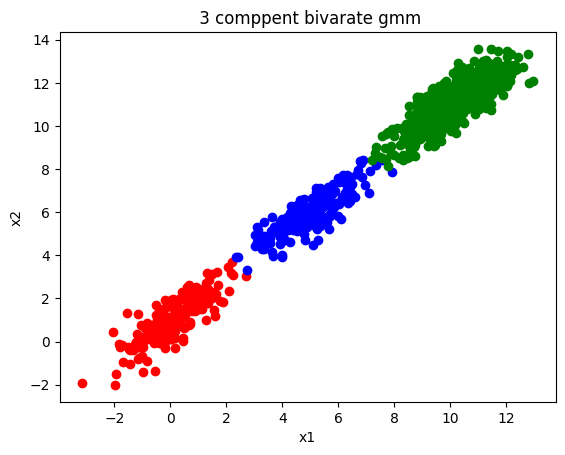

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# parameter for first guassian
d = 2 # Number of dimensions
prob = [0.2 , 0.2 , 0.6]
mean = np.matrix([[0.], [1.]])

print('mean', mean)
var_x = 1
var_y = 1
corr = 0.8
covariance = np.matrix([[var_x, corr * np.sqrt(var_x * var_y)], [corr * np.sqrt(var_x * var_y), var_y]])

# parameters for second guassian
mean2 = np.matrix([[5.], [6.]])
var_x2 = 1
var_y2 = 1
corr2 = 0.8
covariance2 = np.matrix([[var_x2, corr2 * np.sqrt(var_x2 * var_y2)], [corr2 * np.sqrt(var_x2 * var_y2), var_y2]])

#parameters for third guassian
mean3 = np.matrix([[10.], [11.]])
var_x3 = 1
var_y3 = 1
corr3 = 0.8
covariance3 = np.matrix([[var_x3, corr3 * np.sqrt(var_x3 * var_y3)], [corr3 * np.sqrt(var_x3 * var_y3), var_y3]])



 
# # Compute the Decomposition:
A = np.linalg.cholesky(covariance)
A2 = np.linalg.cholesky(covariance2)
A3 = np.linalg.cholesky(covariance3)
 
# # Sample X from standard normal
n = 1000 # Samples to draw

Z = np.random.normal(size=(d, 1))
x = np.dot(A,Z) + mean
# print(x)
# print (np.shape(x))
 
# Apply the transformation at set probility
def sample_guassian(mean, mean2, mean3, covariance, covariance2, covariance3, n, prob, d):
    # Compute the Decomposition:
    A = np.linalg.cholesky(covariance)
    A2 = np.linalg.cholesky(covariance2)
    A3 = np.linalg.cholesky(covariance3)


 
    X = np.zeros((d+1,n))
    print ('shape X ', np.shape(X))
    for i in range(n):
        r = np.random.rand() 
        if r <= prob[0]:
            Z = np.random.normal(size=(d, 1))
            x= np.dot(A,Z) + mean

        
            #replace the i-th row of X with x
            X[0,i] = x[0]
            X[1,i] = x[1]
            X[2,i] = 0

            
            #add a 0 to the end of each sample
            #X = np.concatenate((X, np.zeros((1, n))), axis=0)
        elif  prob[0] <= r <= prob[0] + prob[1]:
            Z = np.random.normal(size=(d, 1))
            x= np.dot(A2,Z) + mean2
            X[0,i] = x[0]
            X[1,i] = x[1]
            X[2,i] = 1
        

        else:
            Z = np.random.normal(size=(d, 1))
            x= np.dot(A3,Z) + mean3
            X[0,i] = x[0]
            X[1,i] = x[1]
            X[2,i] = 2
    return X



def Gaussain_pdf(X, var_x, var_y, corr, mean): 
    x1 = X[0]
    x2 = X[1]
    var_x = var_x
    var_y = var_y
    corr = corr
    mean = mean

    a = 1 / (2 * np.pi *np.sqrt(var_x)*np.sqrt(var_y) * np.sqrt(1-corr**2))
    b = np.square(x1-mean[0]/var_x)
    c = np.square(x2-mean[1]/var_y)
    d = 2*corr*np.multiply((x1-mean[0]),(x2-mean[1]))/(np.sqrt(var_x)*np.sqrt(var_y))
    
   
    e = np.exp(-1/(2*(1-corr**2))*(b+c-d))
    return a*e


#3d scatter plot with labels 
fig = plt.figure()
ax = fig.add_subplot(111)
X = sample_guassian(mean, mean2, mean3, covariance, covariance2, covariance3, n, prob, d)

print ('shape x', np.shape(X))



#split the data into 3 classes
X1 = X[:,   X[2,:] == 0]
X2 = X[:,   X[2,:] == 1]
X3 = X[:,   X[2,:] == 2]

print ('shape x1', np.shape(X1))
print ('shape x2', np.shape(X2))
print ('shape x3', np.shape(X3))


# plot X1
ax.scatter(X1[0,:], X1[1,:],  c='r', marker='o')
# plot X2
ax.scatter(X2[0,:], X2[1,:],   c='b', marker='o')
# plot X3
ax.scatter(X3[0,:], X3[1,:],   c='g', marker='o')
ax.set_title(' 3 comppent bivarate gmm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()








In [2]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    mu3 = lis1[2]
    s1=lis1[3]
    s2=lis1[4]
    s3=lis1[5]

    x = np.linspace(X[0,:].min(),X[0,:].max(), 1000)
    y = np.linspace(X[1,:].min(),X[1,:].max(), 1000)
    x, y = np.meshgrid(x,y) 
    pos = np.dstack((x, y))               # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = x; pos[:, :, 1] = y   



    Z1 = multivariate_normal(mu1, s1)  
    Z2 = multivariate_normal(mu2, s2)
    Z3 = multivariate_normal(mu3, s3)
    Z1 = Z1.pdf(pos)
    Z2 = Z2.pdf(pos)
    Z3 = Z3.pdf(pos)

    plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
    plt.scatter(X[0,:], X[1,:], marker='o')     

    plt.contour(x, y, Z1, colors="r" ,alpha = 0.5) 
    plt.contour(x, y, Z2, colors="b" ,alpha = 0.5) 
    plt.contour(x, y, Z3, colors="g" ,alpha = 0.5)
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.title('State', fontsize=22)                                            # Title of the plot
    plt.grid()                                                                         # displaying gridlines
    plt.show()

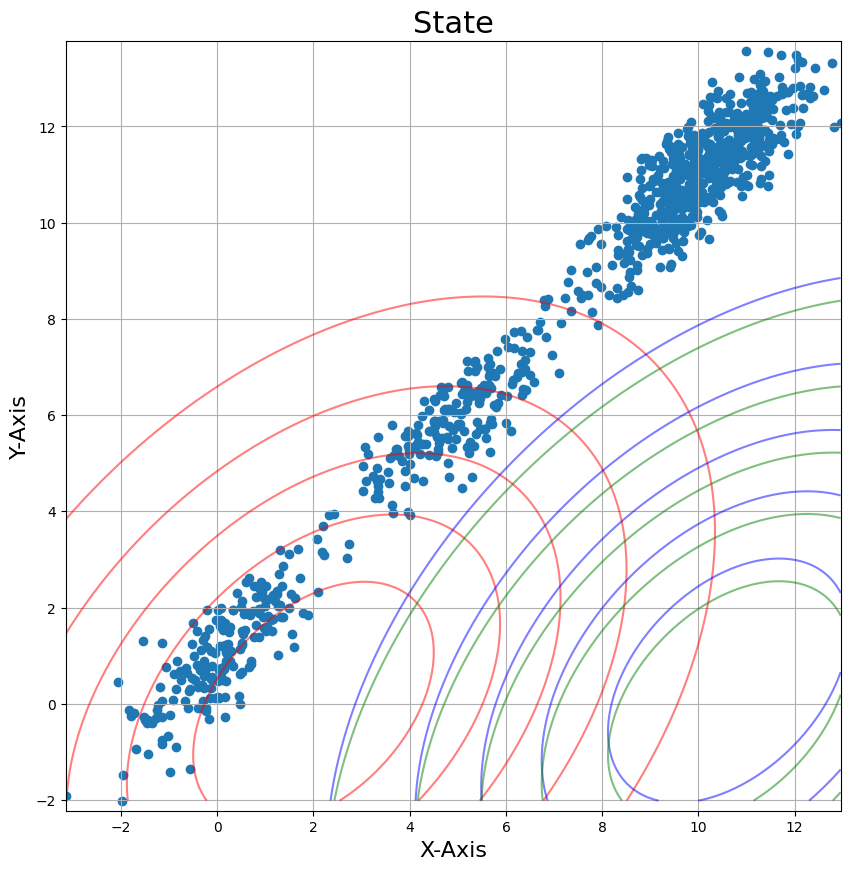

In [127]:
#intialize the parameters

# 3 random  2d gaussians
m1 = [np.random.choice(X[:,0]), np.random.choice(X[:,1])]
m2 = [np.random.choice(X[:,0]), np.random.choice(X[:,1])]
m3 = [np.random.choice(X[:,0]), np.random.choice(X[:,1])]
# m2 = random.choice(d)
# m3 = random.choice(d)	
Y = np.reshape(X, (1000,3))
Y = Y[:,0:2]
cov1 = np.cov(np.transpose(Y))
cov2 = np.cov(np.transpose(Y))
cov3 = np.cov(np.transpose(Y))	
pi1 = 0.2
pi2 = 0.2

from scipy.stats import multivariate_normal

lis1=[m1,m2, m3, cov1,cov2, cov3, pi1, pi2]	

plot(lis1)

In [118]:

##Expectation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1] 
    m3 = lis1[2]	
    cov1=lis1[3]
    cov2=lis1[4]
    cov3=lis1[5]
    pi1 = lis1[6]
    pi2 = lis1[7]
    
    print ('x shaoe', np.shape(X))
    Y = np.reshape(X, (1000,3))
    Y = Y[:,0:2]
    # print ('y shape', np.shape(Y))
    # print ('y', Y)
    # print ('m1', m1)
    print ('m3' , m3)
    print ('cov3', cov3)

    pt3 = multivariate_normal.pdf(Y, mean=m3, cov=cov3)
    pt2 = multivariate_normal.pdf(Y,  mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(Y,  mean=m1, cov=cov1)


    w1 = pi1 * pt2 
    w2 = pi2* pt1
    w3 = (1-pi1-pi2) * pt3
    eval1 = w1/(w1+w2+w3)
    eval2 = w2/(w1+w2+w3)
    eval3 = w3/(w1+w2+w3)

    print
    
    print ('eval1', np.shape(eval1))
    print ('eval2', np.shape(eval2))
    print ('eval3', np.shape(eval3))

    
    return(eval1, eval2, eval3)	

In [125]:
## Maximization step
def Mstep(eval1, eval2, eval3):
    #eval1=[m1,m2,cov1,cov2,pi]
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0
    num_mu3, din_mu3 = 0,0	

    d=X

    for i in range(0,len(d[0,:])):
    
        num_mu1 += (eval1[i]) * d[0:2,i]
        din_mu1 += (eval1[i])

        num_mu2 += eval2[i] * d[0:2,i]
        din_mu2 += eval2[i]

        num_mu3 += eval3[i] * d[0:2,i]
        din_mu3 += eval3[i]

    print ('num_mu1', num_mu1)
    print ('din_mu1', din_mu1)

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2
    mu3 = num_mu3/din_mu3

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    num_s3, din_s3 = 0,0 
    for i in range(0,len(d[0,:])):

        q1 = np.matrix(d[0:2,i]-mu1)
        num_s1 += (eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (eval1[i])

        q2 = np.matrix(d[0:2,i]-mu2)
        num_s2 += eval2[i] * np.dot(q2.T, q2)
        din_s2 += eval2[i]

        q3 = np.matrix(d[0:2,i]-mu3)
        num_s3 += eval3[i] * np.dot(q3.T, q3)
        din_s3 += eval3[i]


    s1 = num_s1/din_s1
    s2 = num_s2/din_s2
    s3 = num_s3/din_s3

    pi1 = sum(eval1)/len(d)
    pi2 = sum(eval2)/len(d)	

    print ('shape of mu3', np.shape(mu2))
    print ('shape of s3', np.shape(s2))
    
    lis2=[mu1,mu2,mu3, s1,s2, s3, pi1, pi2]
    return(lis2)

In [128]:
#Calling the functions and repeating until it converges

iterations = 20
lis1=[m1,m2,m3, cov1,cov2,cov3, pi1, pi2]
for i in range(0,iterations):
    print ('iteration', i)
    out1, out2, out3 = Estep(lis1)
    lis2 = Mstep(out1, out2, out3)
    lis1=lis2
    # if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
    #     # plot(lis1)




iteration 0
x shaoe (3, 1000)
m3 [10.62077368985136, 0.011396275534167818]
cov3 [[19.68699323  8.43423844]
 [ 8.43423844 20.26582425]]
eval1 (1000,)
eval2 (1000,)
eval3 (1000,)
num_mu1 [ 953.13458353 1083.02913597]
din_mu1 132.93980105043045
shape of mu3 (2,)
shape of s3 (2, 2)
iteration 1
x shaoe (3, 1000)
m3 [7.18749583 8.16449628]
cov3 [[16.21877963 16.14141571]
 [16.14141571 16.45108462]]
eval1 (1000,)
eval2 (1000,)
eval3 (1000,)
num_mu1 [-49555.84428809 -54316.66359043]
din_mu1 -3932.48331093002
shape of mu3 (2,)
shape of s3 (2, 2)
iteration 2
x shaoe (3, 1000)
m3 [11.37552185 12.51596387]
cov3 [[-0.09994297  0.99230945]
 [ 0.99230945  2.28611634]]


ValueError: The input matrix must be symmetric positive semidefinite.

In [124]:
print(len(X[0,:]))


1000


Automatically created module for IPython interactive environment


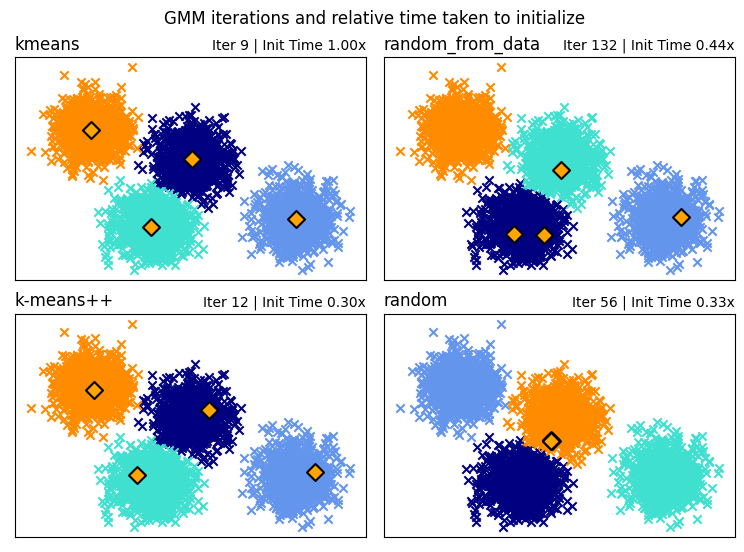

In [ ]:
# # # # now combine the two datasets
# # # Z = np.concatenate((X, Y), axis=1)
# # # print(np.shape(Z))


# # k-means clustering
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2, random_state=0).fit(np.asarray(X))
# print(kmeans.labels_)
# print(kmeans.cluster_centers_)
# print(kmeans.inertia_)
# print(kmeans.n_iter_)
# print(kmeans.n_clusters)

# # number of samples in each cluster
# print(np.bincount(kmeans.labels_))

# # seprate the two clusters
# cluster1 = X[:,kmeans.labels_==0]
# cluster2 = X[:,kmeans.labels_==1]


# # now we need to find the mean and vraiances of each cluster

# def find_mean(cluster):
#     #find mean of each cluster
#     mean_k_1 = int(abs(np.mean(cluster[0,:], axis=1)))
#     mean_k_2 = int(abs(np.mean(cluster[1,:], axis=1)))
#     mean_K_1 = np.matrix([[mean_k_1], [mean_k_2]])
#     return mean_K_1

# def find_covariance(cluster):
#     #find covariance of each cluster
#     #find correlation
#     var_k_1 = np.var(cluster, axis=1)
 
#     corr_k_1 = np.corrcoef(cluster[0,:], cluster[1,:])
#     corr_k_1 = corr_k_1[0,1]
#     return var_k_1,  corr_k_1

# # find mean and covariance of each cluster
# mean_K_1 = find_mean(cluster1)
# mean_K_2 = find_mean(cluster2)
# var_k_1, corr_k_1 = find_covariance(cluster1)
# var_k_2, corr_k_1_2 = find_covariance(cluster2)



# from scipy.stats import norm
# # sub  3d plot of the two clusters and the pdfs
# fig = plt.figure()
# ax = fig.add_subplot(1, 2, 1, projection='3d')

# #plot the original data
# ax.scatter(X1[0,:], X1[1,:], Gaussain_pdf(X1, var_x, var_y, corr, mean ), c='r', marker='o')
# ax.scatter(X2[0,:], X2[1,:], Gaussain_pdf(X2, var_x2, var_y2, corr2, mean2 ), c='b', marker='o')
# ax.set_xlabel('x1')
# ax.set_ylabel('x2')
# ax.set_zlabel('pdf')
# ax.set_title('Original Data')

# # #plot the clusters
# # ax = fig.add_subplot(1, 2, 2, projection='3d')


# # ax.scatter(cluster1[0,:], cluster1[1,:],  Gaussain_pdf(cluster1, var_k_1[0], var_k_1[1], corr_k_1, mean_K_1 ),  c='r', marker='o')
# # ax.scatter(cluster2[0,:], cluster2[1,:],  Gaussain_pdf(cluster2, var_k_2[0], var_k_2[1], corr_k_1_2, mean_K_2 ),  c='b', marker='o')
# # ax.set_xlabel('x1')
# # ax.set_ylabel('x2')
# # ax.set_zlabel('pdf')
# # ax.set_title('K-meClustered Data')
# plt.show()
